In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.decomposition import PCA
import cPickle as pickle
import pandas as pd


In [37]:
def convert_rgb(org_color):
    
    # org_color is type string: '174.199.232'
    # Original values are scaled 1-255
    # rgb_color is type tuple
    # Final color is scaled 0-1: (0.643,0.416,0.894)
    
    str_vec = org_color.strip().split('.')#type list - of strings
    num_vec = [float(s) for s in str_vec]#type list - of floats
    rgb_scale = [(n/255) for n in num_vec]#type list - of scaled floats
    
    # Note: Tried a regular expression...
    # It doesn't work - e.g.,:  t2 = [t[i] for i in t]
    # TypeError: tuple indices must be integers, not float
    rgb_tuple = (rgb_scale[0],rgb_scale[1],rgb_scale[2])
    return rgb_tuple
    

In [38]:
def tableau10():
    # returns a dict with color names as keys and converted rgb tuples as values
    #http://tableaufriction.blogspot.ro/2012/11/finally-you-can-use-tableau-data-colors.html

    tableau={}#dict
    color_key = [
    'dark_grey','med_grey','med2_grey','med3_grey','med4_grey','light_grey',
    'blue','orange','green','red','purple',
    'turq','puke','brown','lav',
    'dark_red','bright_red','fushia_red','salmon','blue_red',
    'cool_blue','purp_blue','med_blue','med2_blue','med3_blue',
    'lav_blue','sky_blue']
    color_str = [
    '50.50.50','75.75.75','100.100.100','125.125.125','150.150.150','200.200.200',
    '31.119.180','255.127.14','44.160.44','214.39.40','148.103.189',
    '23.190.207','188.189.34','140.86.75','227.119.194',
    '177.3.24','240.39.32','189.10.54','242.108.100','177.3.74',
    '44.105.176','144.158.206','107.163.214','137.183.214','95.158.209',
    '181.200.226','177.213.240']
    
    for idx in range(0,len(color_key)):
        #print(color_str[idx])
        tup = convert_rgb(color_str[idx])
        #tableau[color_key[idx]] = color_str[idx]
        tableau[color_key[idx]] = tup
    
    #For Displaying/debugging
    #print(tableau.items())
    #print(tableau['dark_grey'])#access by color-name
    return tableau

In [39]:
gammas = pickle.load(open('gammas.p','rb'))
norm_gammas = pickle.load(open('norm_gammas.p','rb'))
ids_gammas_df = pickle.load(open('ids_gammas_df.p','rb'))
ids_ngammas_df = pickle.load(open('ids_ngammas_df.p','rb'))

ids_gammas_df.shape#(7320, 102)
ids_ngammas_df.shape#(7320, 102)


(7320, 102)

In [40]:
#made in Extract_Reviews
reviews_df = pickle.load(open('ortho_review_df.p','rb'))

In [41]:
reviews_df.head(3)
stars = reviews_df.loc[:,'stars']

reviews_df.shape#(7320, 5)
stars = np.asarray(stars)#(7320,)
print stars[0]

5.0


In [42]:
def feature_normalize(X):
    # X is an mxn numpy array    
    
    # Strangely, axis=0 is the mean over the columns
    mu = np.mean(X,axis=0)
    sd = np.std(X,axis=0)
    X_norm = (X - mu)/sd

    return X_norm

In [43]:
def pca_scatter(T,group,xlab,ylab):
    
    tab = tableau10()
    
    x1 = T[group==1,0]
    x2 = T[group==2,0]
    x3 = T[group==3,0]
    x4 = T[group==4,0]
    x5 = T[group==5,0]
    
    fig = plt.figure(figsize=(4,4))
    ax = plt.axes()
    plt.plot(x1+.5,T[group==1,1]+.5,color=tab['red'],
             marker='D',ms=6, mec=tab['med2_grey'],
            linewidth=0, label='1 star')
    plt.plot(x2+.4,T[group==2,1]+.4,color=tab['orange'],
             marker='D',ms=6, mec=tab['med2_grey'],lw=0, label='2 stars')
    plt.plot(x3+.3,T[group==3,1]+.3,color=tab['green'],
             marker='D',ms=6, mec=tab['med2_grey'],lw=0, label='3 stars')
    plt.plot(x4+.2,T[group==4,1]+.2,color=tab['blue'],
             marker='D',ms=6, mec=tab['med2_grey'],lw=0, label='4 stars')
    plt.plot(x5,T[group==5,1],color=tab['purple'],
             marker='D',ms=6, mec=tab['med2_grey'],lw=0, label='5 stars')
    
    plt.setp([ax.set_xlabel(xlab),ax.set_ylabel(ylab)],fontsize=11,color=tab['dark_grey'])
    plt.setp([ax.get_xticklines(),ax.get_yticklines()],color=tab['light_grey'])
    plt.setp([ax.get_xticklabels(),ax.get_yticklabels()],color=tab['med2_grey'],fontsize=9)
    
    leg = plt.legend(loc='lower right',fontsize=11, numpoints=1)
    leg.get_frame().set_edgecolor(tab['light_grey'])
    for text in leg.get_texts():
        plt.setp(text,color=tab['med3_grey'])
    
    #Change just one axis
    #ax.spines['bottom'].set_color((tab['light_grey']))
    
    plt.draw()
    plt.show()
    return

('\nPCA: % Variance Explained: ', array([ 1.017,  1.015]))


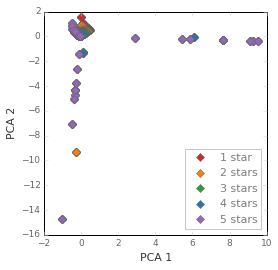

In [63]:
# PCA - instantiate object and fit
pca = PCA(n_components=2)

feature_norm_gammas = feature_normalize(gammas)
pca.fit(feature_norm_gammas)
#pca.fit(norm_gammas)

print('\nPCA: % Variance Explained: ',np.round(pca.explained_variance_ratio_*100,3))

# components are eigenvectors
EV = np.round((pca.components_),5).T

# PROJECTED GAMMAS
# Use this d x k eigenvector matrix to transform the original samples onto the component subspace. 
# Arg for transform is projected on the principal components extracted from the training set
X_pca = pca.transform(feature_norm_gammas)# gammas mapped onto new feature space

xlabel='PCA 1';ylabel='PCA 2'   
pca_scatter(X_pca, stars, xlabel, ylabel)

In [62]:
print '\nPCA Component Loadings (Eigenvectors): \n'
#for i in range(0,len(EV)):
    #print 'Topic: ',i,'   ',EV[i,:]

EV_df = pd.DataFrame(EV[:,:]).sort(0, axis=0, ascending=False)
print(EV_df)
#print EV[:5,0]


PCA Component Loadings (Eigenvectors): 

          0        1
95  0.98595 -0.03669
83 -0.00331  0.00229
36 -0.00400  0.00279
60 -0.00428  0.00300
57 -0.00449  0.00315
45 -0.00463  0.00326
18 -0.00464  0.00326
78 -0.00502  0.00355
2  -0.00506  0.00372
37 -0.00520  0.00369
9  -0.00540  0.00384
76 -0.00541  0.00385
92 -0.00555  0.00395
65 -0.00590  0.00422
21 -0.00596  0.00427
72 -0.00617  0.00443
96 -0.00617  0.00443
90 -0.00622  0.00447
1  -0.00626  0.00450
79 -0.00644  0.00464
41 -0.00652  0.00471
56 -0.00677  0.00491
43 -0.00682  0.00495
24 -0.00693  0.00504
38 -0.00699  0.00508
99 -0.00703  0.00512
86 -0.00713  0.00520
80 -0.00715  0.00522
84 -0.00717  0.00523
68 -0.00720  0.00526
..      ...      ...
52 -0.01418  0.01177
34 -0.01500 -0.19635
16 -0.01516  0.01285
20 -0.01541  0.01313
23 -0.01557  0.01331
33 -0.01596  0.01375
32 -0.01657  0.01447
75 -0.01747  0.01557
40 -0.01801  0.01623
31 -0.01808  0.01632
42 -0.01833  0.01667
55 -0.01924  0.01784
69 -0.01949  0.01818
62 -0.01995  